In [1]:
% run qpfs_class_draft.ipynb

In [2]:
from model_quality import *
from selector import *
from model_comparison import *
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression

In [3]:
s = Selector(QPFS(), "QPFS")
lin = LinearRegression()
pls = PLSRegression()

In [4]:
q = ModelQuality(s, lin)

In [36]:
import scipy.stats as sps

XX = sps.norm.rvs(size=(100, 5))
X2 = sps.norm.rvs(size=(10, 5))
zz = sps.uniform.rvs(size=(5, 3))
yy = XX @ zz + sps.norm.rvs(scale=0.1, size=(100, 3))
y2 = X2 @ zz + sps.norm.rvs(scale=0.1, size=(10, 3))
maskk = np.ones(XX.shape[1])
maskk[2]=0
maskk[1] = 0
maskk[3] = 0
print(maskk)

metric1 = RSS()
metric2 = Adjusted_Determination_Coefficient()
metric3 = Determination_Coefficient()
metric4 = VIF()
metric5 = BIC()
char1 = Condition_Number()
comp1 = Cp()

[ 1.  0.  0.  0.  1.]


In [37]:
c = ModelComparison([[s, lin], [s, pls]])

In [38]:
c.fit(XX, yy, ns_features = np.arange(2, len(XX[0])))

In [39]:
c.evaluate([metric1, metric2, metric3, metric4, metric5],
                           [comp1], [char1], mode='dynamic')

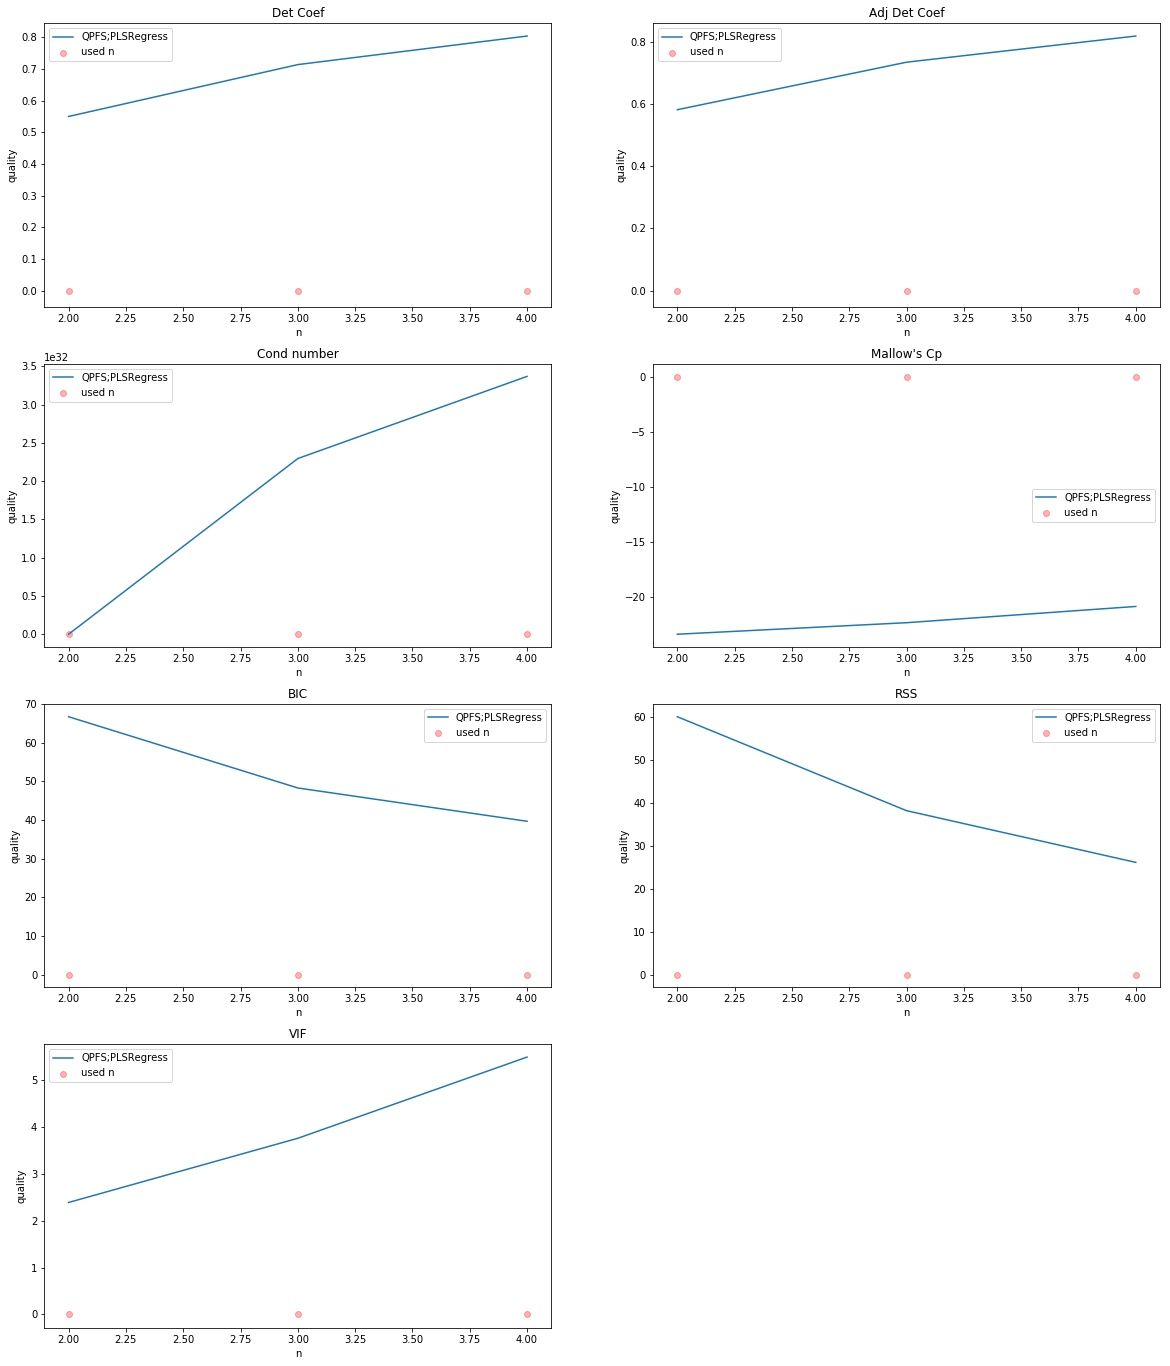

In [41]:
c.draw_quality(indices=[1])

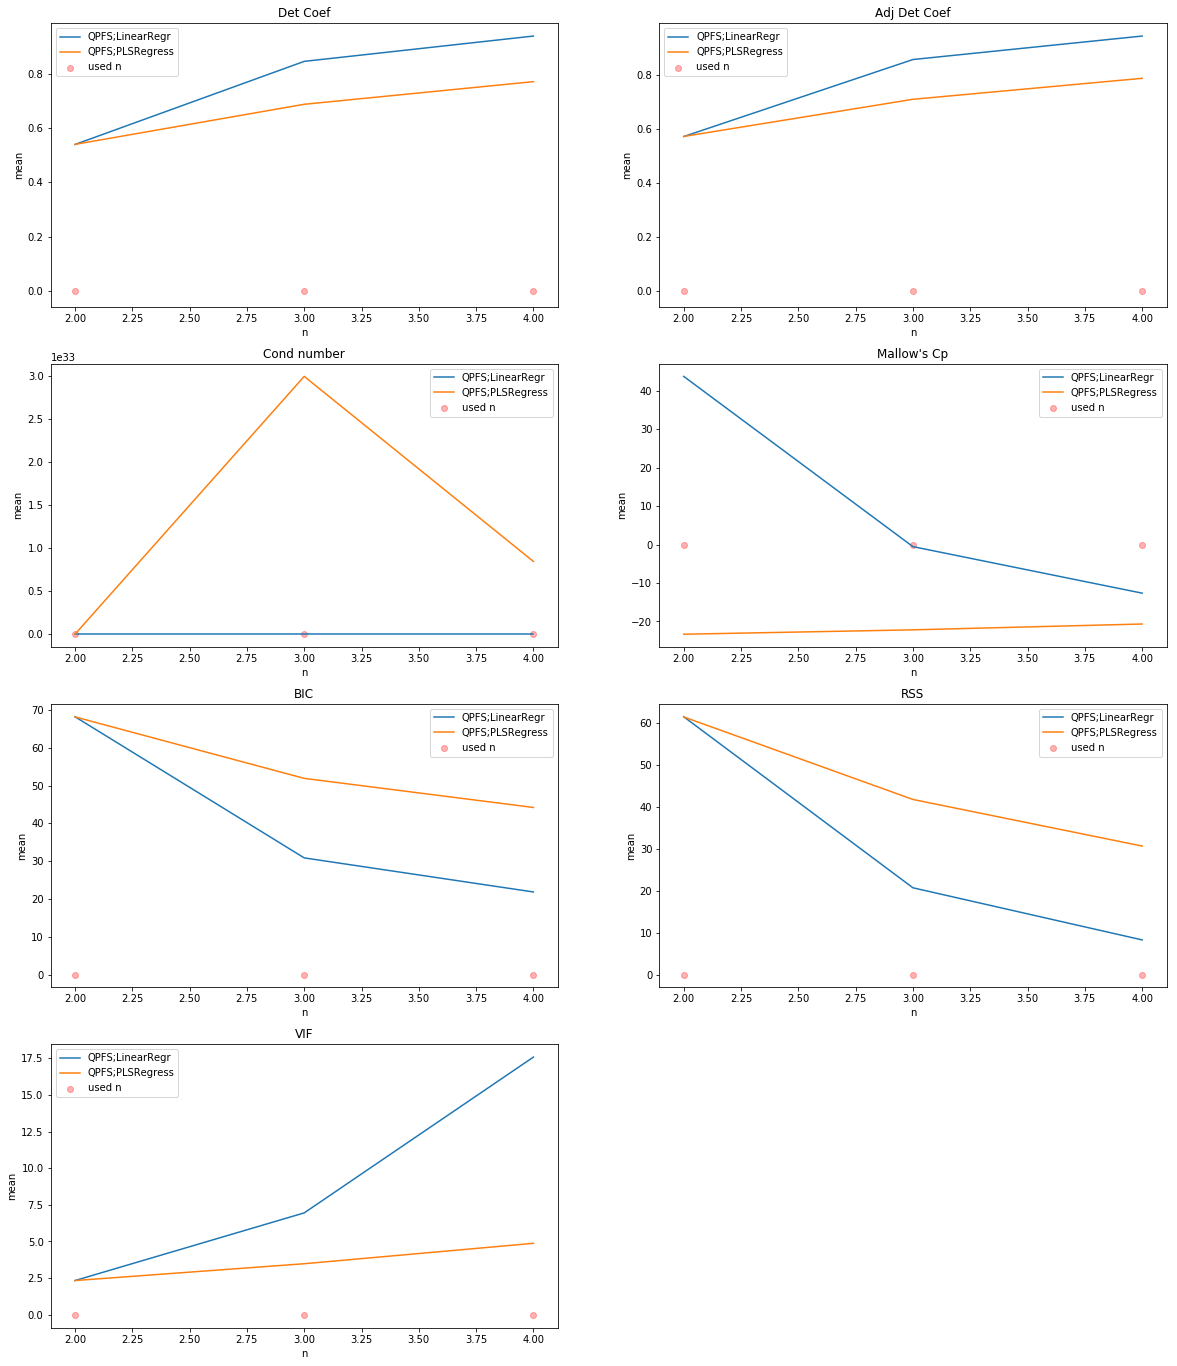

In [42]:
c.draw_mean()

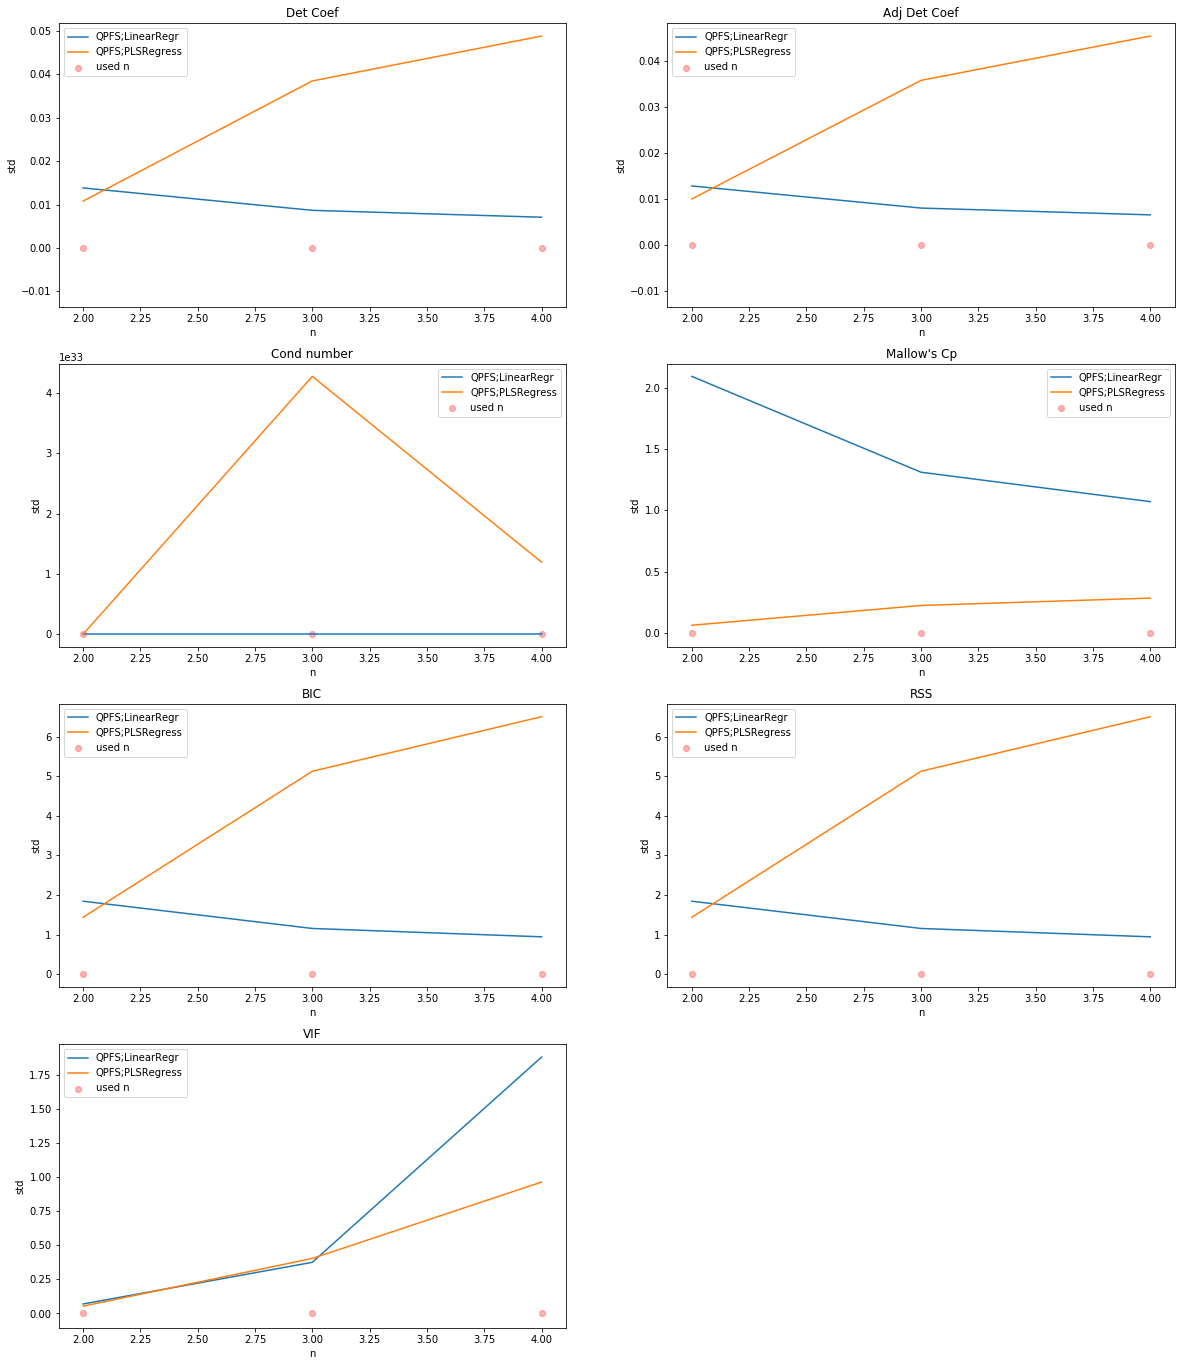

In [43]:
c.draw_std()

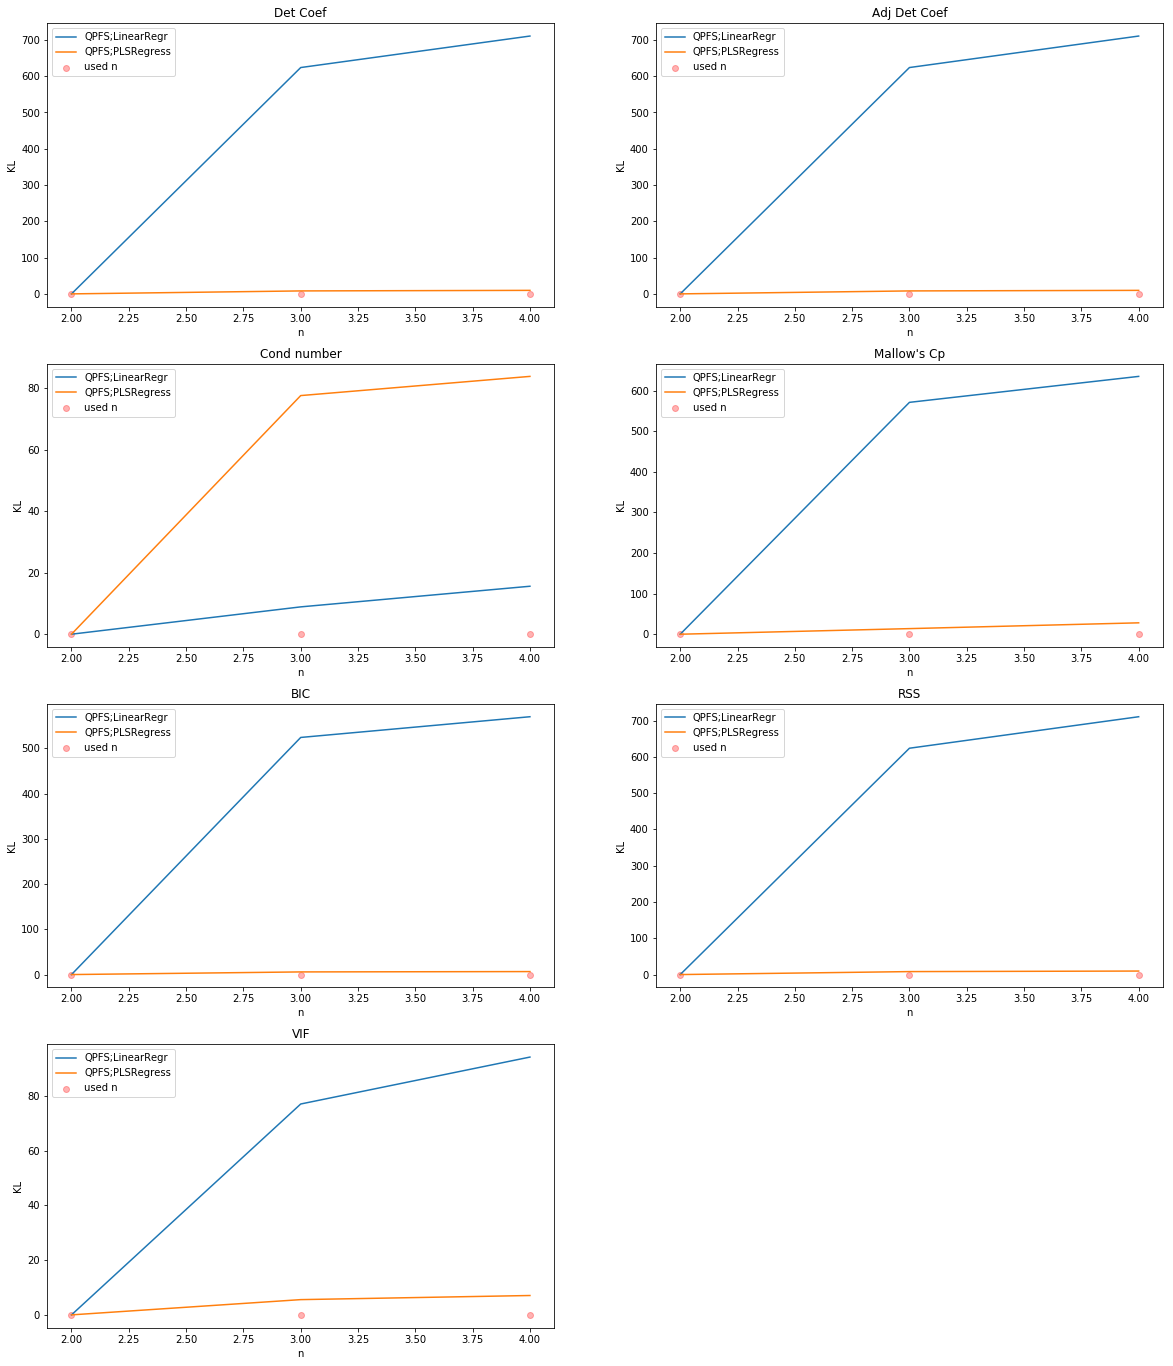

In [44]:
c.draw_KL()